In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

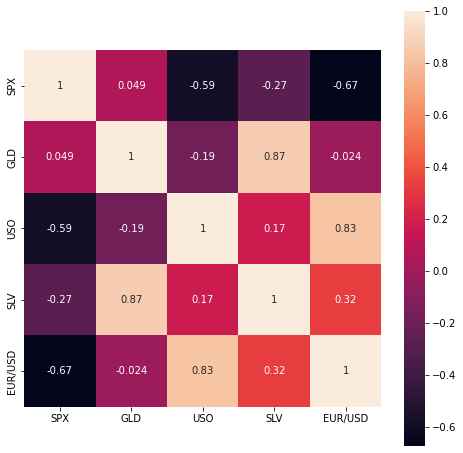

In [12]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
# sns.heatmap(correlation,square=True, fmt='.1f',annot=True)
sns.heatmap(correlation,square=True,annot=True)

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [14]:
sns.set_style('whitegrid')

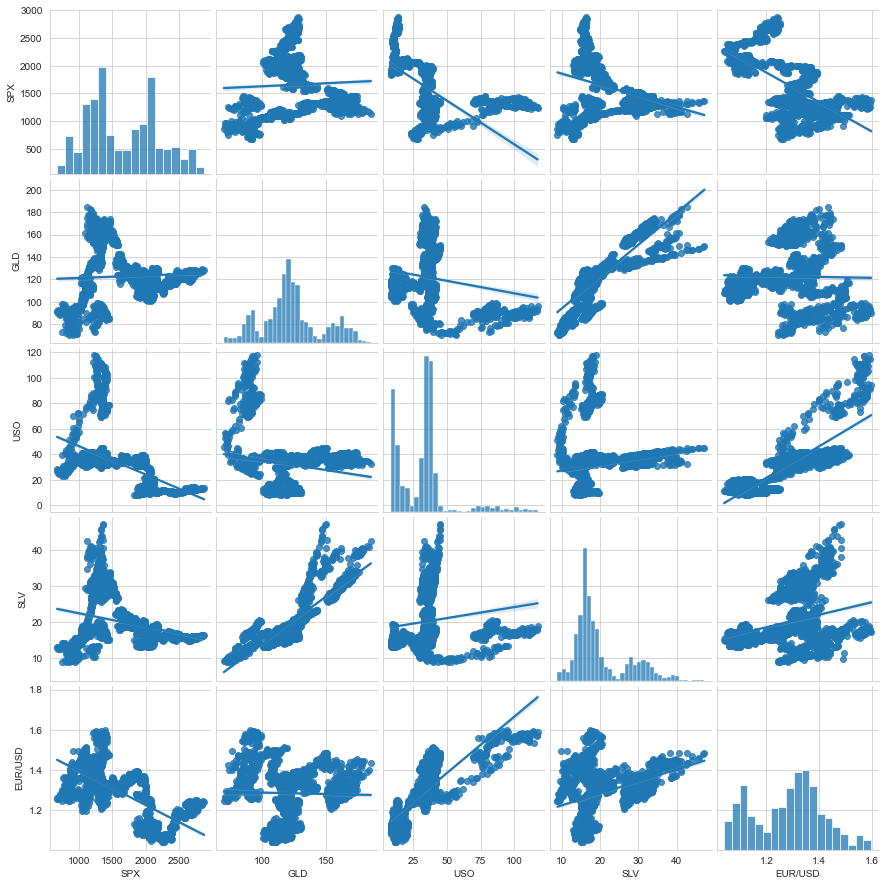

In [15]:
sns.pairplot(data=gold_data,kind='reg')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

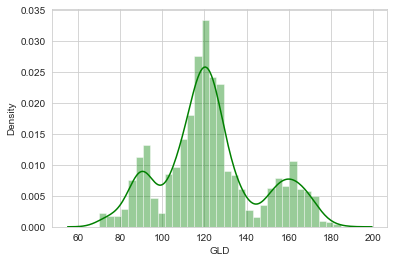

In [16]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [17]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [18]:
target=gold_data['GLD']
features=gold_data.drop(['Date','GLD'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(
    features,target,test_size=0.25,random_state=101
)

Model Training

In [20]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(xtrain,ytrain)

In [21]:
print('Linear Model (Train): ', round(model_linear.score(xtrain,ytrain)*100,1),'%')
print('Linear Model (Test): ', round(model_linear.score(xtest,ytest)*100,1),'%')


Linear Model (Train):  88.0 %
Linear Model (Test):  88.6 %


Improving the model

In [22]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)


In [23]:
print('Decision Tree (Train): ', round(model_dt.score(xtrain,ytrain)*100,1),'%')
print('Decision Tree (Test): ', round(model_dt.score(xtest,ytest)*100,1),'%')

Decision Tree (Train):  100.0 %
Decision Tree (Test):  97.7 %


In [24]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

In [25]:
print('RF Model (Train): ', round(model_rf.score(xtrain,ytrain)*100,1),'%')
print('RF Model (Test): ', round(model_rf.score(xtest,ytest)*100,1),'%')

RF Model (Train):  99.8 %
RF Model (Test):  99.0 %


Model Evaluation

In [26]:
# prediction on Test Data
test_data_prediction = model_rf.predict(xtest)

In [27]:
print(test_data_prediction)

[127.08289901 104.33579958 121.62920025 125.29069929 114.8293002
 118.92719961 154.65459982 122.3603991   99.14849905 125.48049959
 114.86860039 117.2811013  156.64719923 117.9122992  117.83479938
  92.14609951 168.28729831 124.42069956 115.27359968 172.06390131
 151.47410191 118.13610089 128.97459917 121.95869953 128.46650341
  89.8976004  118.91020086  90.70780196 120.52989901 125.43390248
  98.04769713 157.78930278 156.32599971 120.48300156 122.97619966
 148.06960139  96.85640007 114.07999966 161.05180229 116.4178008
 120.04390183 125.29190002 157.06880008 118.22310148 125.87189987
 114.8995002   86.68249947 108.02429987 116.00380084 124.81480225
 138.51770063  92.43039864 107.32690095 146.34210026 116.90140133
 155.24610314 120.34609897 165.32040119 162.49640254 131.6954987
 107.47999849 148.39170048 160.6536998   93.88859908 109.66340029
 116.28230094 121.2211003  110.39369917 119.58550202 127.41819828
  90.62299997 124.07290028 156.04519976 149.56760406  91.57179888
 123.77289999

Compare the Actual Values and Predicted Values in a Plot

In [28]:
Y_test = list(ytest)

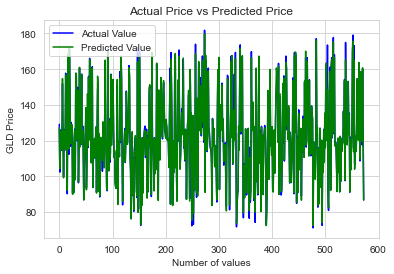

In [29]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [31]:
query_data={
    'SPX':[1447],
    'USO':[78],
    'SLV':[15],
    'EUR/USD':[1.47]
}
result=model_rf.predict(pd.DataFrame(query_data))
print(result[0])

85.35209857000005


Creating a pickle file

In [30]:
pd.to_pickle(model_rf,'GoldPricePredictor.pickle')